#import, EDA, split, train

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score ,classification_report, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.inspection import (PartialDependenceDisplay, permutation_importance)
from sklearn.ensemble import AdaBoostClassifier
import graphviz
from sklearn.tree import export_graphviz


In [ ]:
df = pd.read_csv('train.csv')
print(df.shape)

(44720, 28)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44720 entries, 0 to 44719
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        44720 non-null  object 
 1   Customer_ID               44720 non-null  object 
 2   Month                     44720 non-null  object 
 3   Name                      40262 non-null  object 
 4   Age                       44720 non-null  object 
 5   SSN                       44720 non-null  object 
 6   Occupation                44720 non-null  object 
 7   Annual_Income             44720 non-null  object 
 8   Monthly_Inhand_Salary     38055 non-null  float64
 9   Num_Bank_Accounts         44719 non-null  float64
 10  Num_Credit_Card           44719 non-null  float64
 11  Interest_Rate             44719 non-null  float64
 12  Num_of_Loan               44719 non-null  object 
 13  Type_of_Loan              39664 non-null  object 
 14  Delay_

In [ ]:
df.isna().sum

<bound method DataFrame.sum of           ID  Customer_ID  Month   Name    Age    SSN  Occupation  \
0      False        False  False  False  False  False       False   
1      False        False  False  False  False  False       False   
2      False        False  False  False  False  False       False   
3      False        False  False  False  False  False       False   
4      False        False  False  False  False  False       False   
...      ...          ...    ...    ...    ...    ...         ...   
44715  False        False  False  False  False  False       False   
44716  False        False  False  False  False  False       False   
44717  False        False  False  False  False  False       False   
44718  False        False  False  False  False  False       False   
44719  False        False  False  False  False  False       False   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0              False                  False              False  ...   
1              False                   True              False  ...   
2              False                   True              False  ...   
3              False                   True              False  ...   
4              False                  False              False  ...   
...              ...                    ...                ...  ...   
44715          False                  False              False  ...   
44716          False                  False              False  ...   
44717          False                   True              False  ...   
44718          False                  False              False  ...   
44719          False                   True               True  ...   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0           False             False                     False   
1           False             False                     False   
2           False             False                     False   
3           False             False                     False   
4           False             False                     False   
...           ...               ...                       ...   
44715       False             False                     False   
44716       False             False                     False   
44717       False             False                     False   
44718       False             False                     False   
44719        True              True                      True   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                   False                  False                False   
1                    True                  False                False   
2                   False                  False                False   
3                   False                  False                False   
4                   False                  False                False   
...                   ...                    ...                  ...   
44715               False                  False                False   
44716               False                  False                False   
44717               False                  False                False   
44718               False                  False                False   
44719                True                   True                 True   

       Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
0                        False              False            False   
1                        False              False            False   
2                        False              False            False   
3                        False              False            False   
4                        False              False            False   
...                        ...                ...              ...   
44715                    False              False            False   
44716                    False              False            False   

drop unwanted columns (name)

In [ ]:
df = df.drop(['Name'], axis=1)

In [ ]:
df = df.dropna(how='any')

In [ ]:
df.isna().sum()


,0
ID,0
Customer_ID,0
Month,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0


In [ ]:
df.shape

(26392, 27)

categories of Credit_Score

In [ ]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

drop unwanted coulmns

In [ ]:
columns =  ["ID", "Customer_ID", "SSN"]
df = df.drop(columns=columns)


Clean non numric characters and convert column to numeric type coercing invalid values to NaN

In [ ]:
numeric_columns = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
                "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace("[^0-9.]", "", regex=True), errors='coerce')

In [ ]:
df = df.dropna(how='any')
df.isna().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


Split Data for Training

In [ ]:
target_col = 'Credit_Score'
y = df[target_col]
X = df.select_dtypes(exclude=['object'])

y_encoded = pd.get_dummies(y)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=True
)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Validation: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (15501, 16), (15501, 3)
Validation: (5167, 16), (5167, 3)
Test: (5167, 16), (5167, 3)


In [ ]:
X_train.isna().sum()

,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#Adaboost

In [ ]:
y_train_labels = y_train.idxmax(axis=1) # one-hot labels to class labels
y_val_labels = y_val.idxmax(axis=1)
y_test_labels = y_test.idxmax(axis=1)

Define AdaBoost with a shallow tree as base estimator


In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

 Train,

In [ ]:
ada_clf.fit(X_train, y_train_labels)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

Predict and Evaluate on Validation Set

In [ ]:
y_val_pred = ada_clf.predict(X_val)
val_acc = accuracy_score(y_val_labels, y_val_pred)
print(f"Validation Accuracy: {val_acc}")
print("Validation Classification Report:")
print(classification_report(y_val_labels, y_val_pred))


Validation Accuracy: 0.6209218021750389
Validation Classification Report:
              precision    recall  f1-score   support

        Good       0.67      0.22      0.33       651
        Poor       0.66      0.59      0.62      1252
    Standard       0.60      0.78      0.68      1959

    accuracy                           0.62      3862
   macro avg       0.64      0.53      0.54      3862
weighted avg       0.63      0.62      0.60      3862

Test Accuracy: 0.6258415328845158
Test Classification Report:
              precision    recall  f1-score   support

        Good       0.72      0.18      0.29       631
        Poor       0.63      0.59      0.61      1196
    Standard       0.62      0.78      0.69      2035

    accuracy                           0.63      3862
   macro avg       0.66      0.52      0.53      3862
weighted avg       0.64      0.63      0.60      3862



Predict and Evaluate on Test Set

In [ ]:
y_test_pred = ada_clf.predict(X_test)
test_acc = accuracy_score(y_test_labels, y_test_pred)
print(f"Test Accuracy: {test_acc}")
print("Test Classification Report:")
print(classification_report(y_test_labels, y_test_pred))

Test Accuracy: 0.6266692471453454
Test Classification Report:
              precision    recall  f1-score   support

        Good       0.76      0.18      0.29       846
        Poor       0.63      0.68      0.65      1670
    Standard       0.62      0.74      0.67      2651

    accuracy                           0.63      5167
   macro avg       0.67      0.53      0.54      5167
weighted avg       0.64      0.63      0.60      5167



feature importances

In [ ]:
feature_importances = ada_clf.feature_importances_
feature_names = [
    'Monthly_Balance',
    'Amount_invested_monthly',
    'Total_EMI_per_month',
    'Credit_Utilization_Ratio',
    'Outstanding_Debt',
    'Num_Credit_Inquiries',
    'Changed_Credit_Limit',
    'Num_of_Delayed_Payment',
    'Delay_from_due_date',
    'Num_of_Loan',
    'Interest_Rate',
    'Num_Credit_Card',
    'Num_Bank_Accounts',
    'Monthly_Inhand_Salary',
    'Annual_Income',
    'Age'
]


In [ ]:
sorted_idx = np.argsort(feature_importances)
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

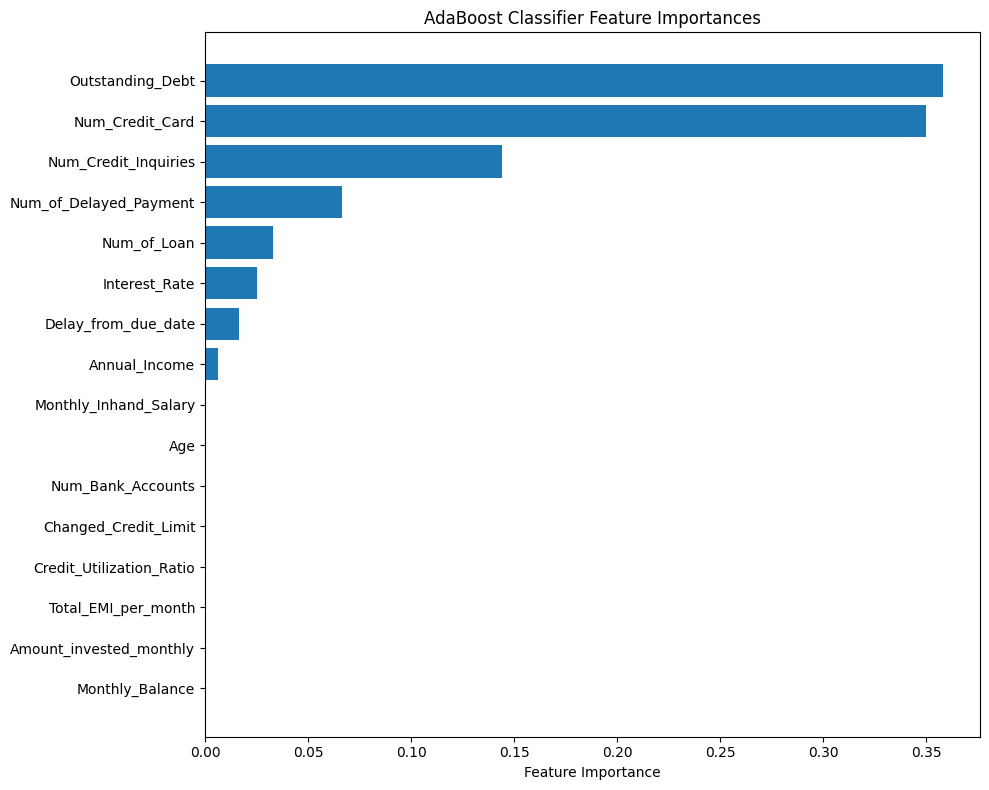

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier Feature Importances')
plt.tight_layout()
plt.show()

permutation importance

<ipython-input-80-edd4d6121042>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


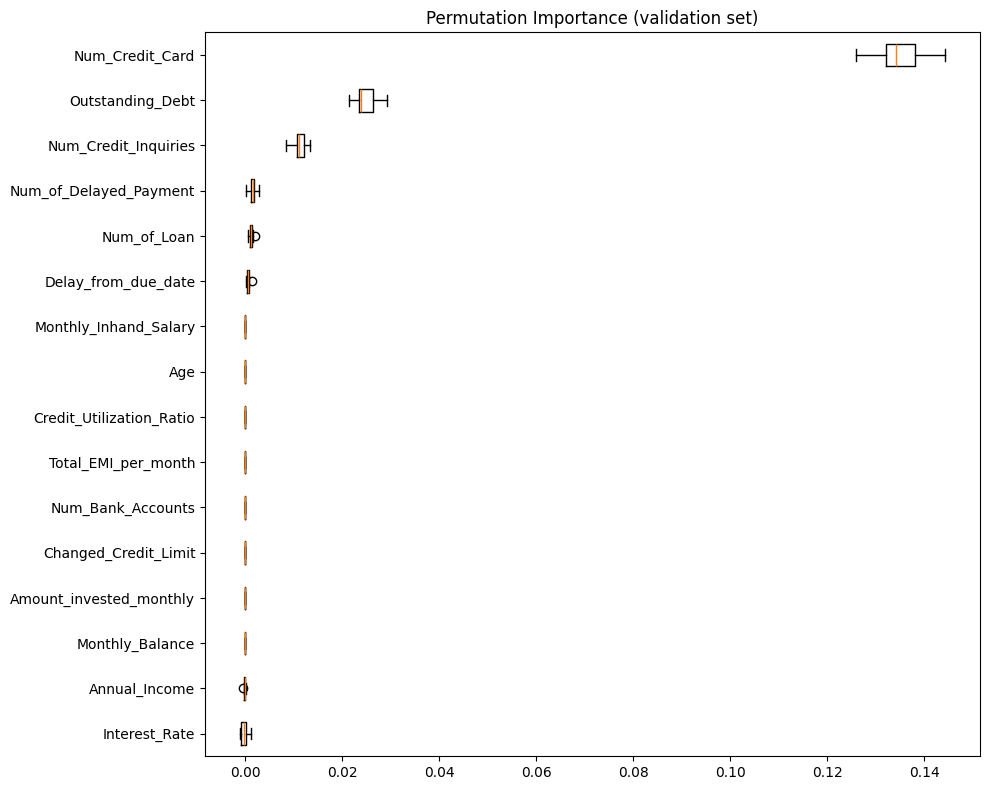

In [ ]:
result = permutation_importance(
    ada_clf, X_val, y_val_labels, n_repeats=10, random_state=42
)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 8))
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False, labels=np.array(feature_names)[sorted_idx]
)
plt.title("Permutation Importance (validation set)")
plt.tight_layout()
plt.show()

 LIME explainer

In [ ]:
import lime
import lime.lime_tabular

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


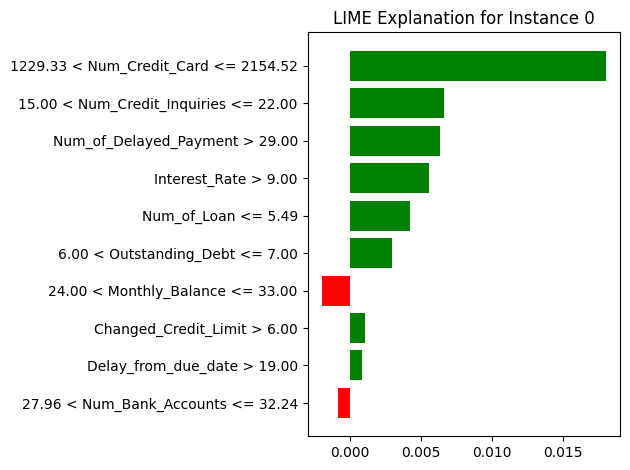

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=ada_clf.classes_,
    mode='classification',
    discretize_continuous=True
)

# specific instance
idx_to_explain = 0
exp = explainer.explain_instance(
    X_val.iloc[idx_to_explain].values,
    ada_clf.predict_proba,
    num_features=10
)

fig = exp.as_pyplot_figure()
plt.title(f'LIME Explanation for Instance {idx_to_explain}')
plt.tight_layout()
plt.show()

surrogate model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
surrogate = LogisticRegression(max_iter=1000)
surrogate.fit(X_train, ada_clf.predict(X_train))

LogisticRegression(max_iter=1000)

 Comparision coefficients with AdaBoost feature importances


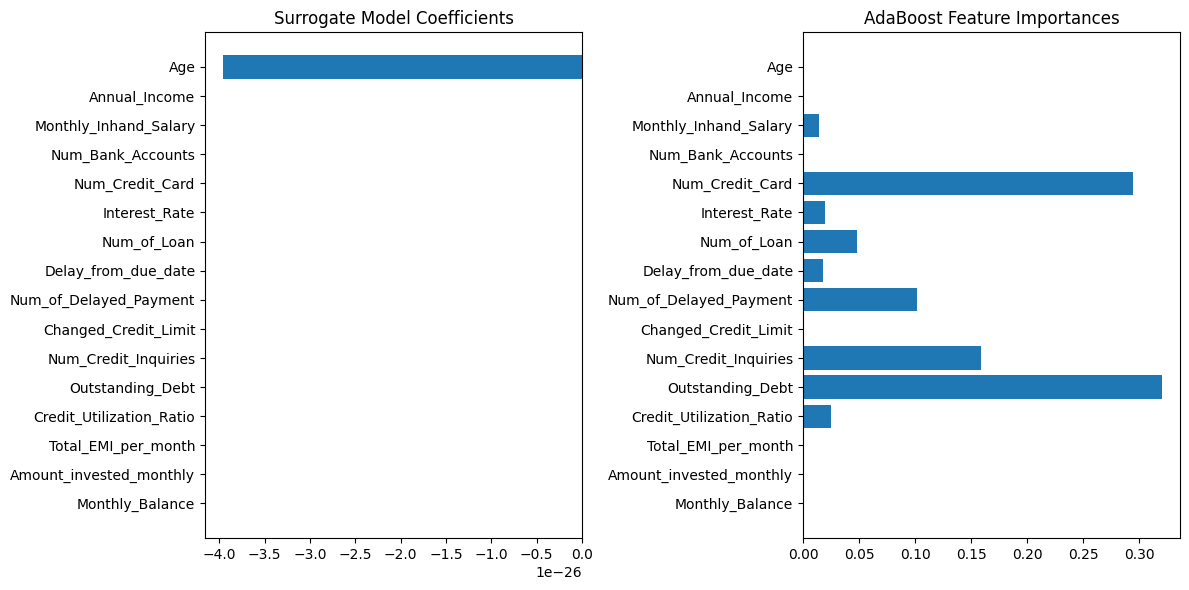

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(feature_names, surrogate.coef_[0])
plt.title('Surrogate Model Coefficients')
plt.subplot(1, 2, 2)
plt.barh(feature_names, feature_importances)
plt.title('AdaBoost Feature Importances')
plt.tight_layout()
plt.show()

lofo importance

In [ ]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

In [ ]:
def lofo_importance(model, X, y, features, cv=5, scoring='accuracy'):
    base_score = np.mean(cross_val_score(
        model, X, y, cv=cv, scoring=scoring
    ))

    importance_scores = []

    for feature in tqdm(features, desc='Calculating LOFO Importance'):
        X_reduced = X.drop(feature, axis=1)
        reduced_score = np.mean(cross_val_score(
            model, X_reduced, y, cv=cv, scoring=scoring
        ))
        importance_scores.append(base_score - reduced_score)
    results = pd.DataFrame({
        'feature': features,
        'importance': importance_scores,
        'remaining_score': base_score - np.array(importance_scores)
    }).sort_values('importance', ascending=False)

    return results

lofo_results = lofo_importance(
    ada_clf,
    X_train,
    y_train_labels,
    feature_names
)

print("LOFO Importance Results:")
print(lofo_results)

Calculating LOFO Importance: 100%|██████████| 16/16 [12:52<00:00, 48.25s/it]

LOFO Importance Results:
                     feature    importance  remaining_score
4           Outstanding_Debt  4.515463e-03         0.627766
10             Interest_Rate  2.128991e-03         0.630153
8        Delay_from_due_date  1.871134e-03         0.630411
1    Amount_invested_monthly  1.161207e-03         0.631121
7     Num_of_Delayed_Payment  6.452029e-04         0.631637
6       Changed_Credit_Limit  5.163163e-04         0.631765
5       Num_Credit_Inquiries  2.579813e-04         0.632024
0            Monthly_Balance  0.000000e+00         0.632282
15                       Age  0.000000e+00         0.632282
3   Credit_Utilization_Ratio  0.000000e+00         0.632282
9                Num_of_Loan  0.000000e+00         0.632282
13     Monthly_Inhand_Salary  0.000000e+00         0.632282
14             Annual_Income  0.000000e+00         0.632282
2        Total_EMI_per_month -4.160989e-08         0.632282
12         Num_Bank_Accounts -1.225765e-03         0.633508
11           Nu

invert_yaxis to show most important at top

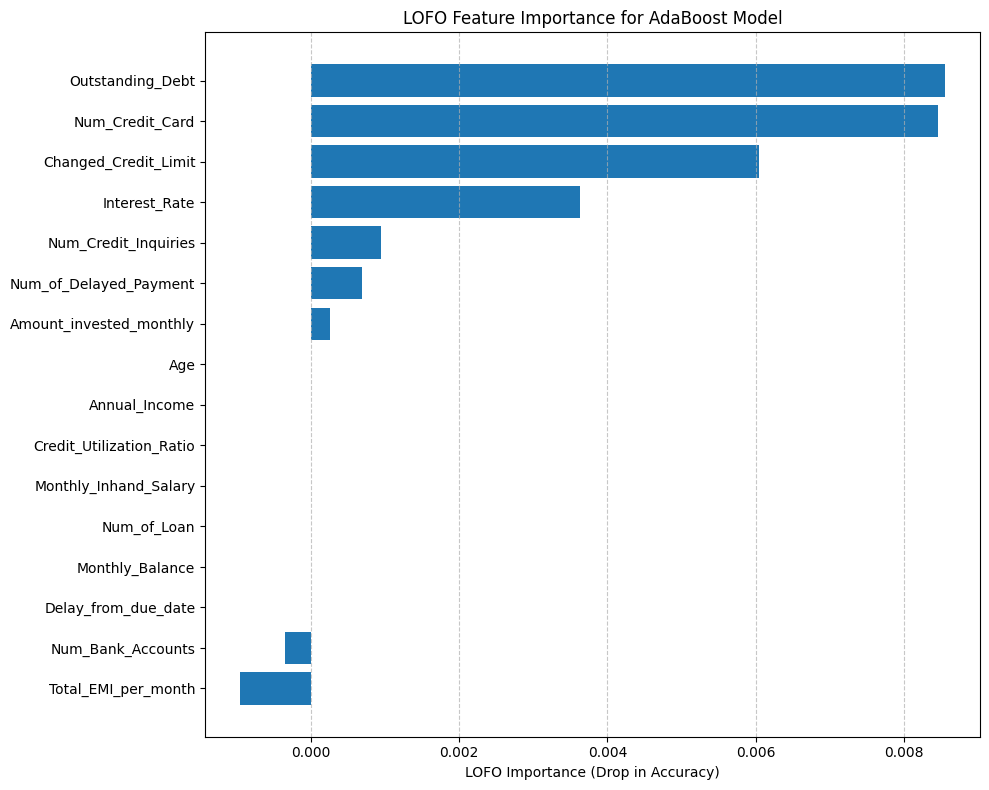

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(lofo_results['feature'], lofo_results['importance'])
plt.xlabel('LOFO Importance (Drop in Accuracy)')
plt.title('LOFO Feature Importance for AdaBoost Model')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print(X_val.dtypes[top_features])


Outstanding_Debt        float64
Interest_Rate             int64
Changed_Credit_Limit    float64
dtype: object


In [ ]:
print(X_train.dtypes)
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)
X_test_encoded = pd.get_dummies(X_test)

Age                           int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                   int64
Delay_from_due_date         float64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
dtype: object


evaluation

In [ ]:
X_train_enc = X_train_enc.astype(np.float64)
X_val_enc = X_val_enc.astype(np.float64)
X_test_enc = X_test_enc.astype(np.float64)

Validation Accuracy: 0.6209218021750389
Validation Classification Report:
              precision    recall  f1-score   support

        Good       0.67      0.22      0.33       651
        Poor       0.66      0.59      0.62      1252
    Standard       0.60      0.78      0.68      1959

    accuracy                           0.62      3862
   macro avg       0.64      0.53      0.54      3862
weighted avg       0.63      0.62      0.60      3862

Test Accuracy: 0.6258415328845158
Test Classification Report:
              precision    recall  f1-score   support

        Good       0.72      0.18      0.29       631
        Poor       0.63      0.59      0.61      1196
    Standard       0.62      0.78      0.69      2035

    accuracy                           0.63      3862
   macro avg       0.66      0.52      0.53      3862
weighted avg       0.64      0.63      0.60      3862

Model class labels: ['Good' 'Poor' 'Standard']
Error creating PDP: '<' not supported between instances

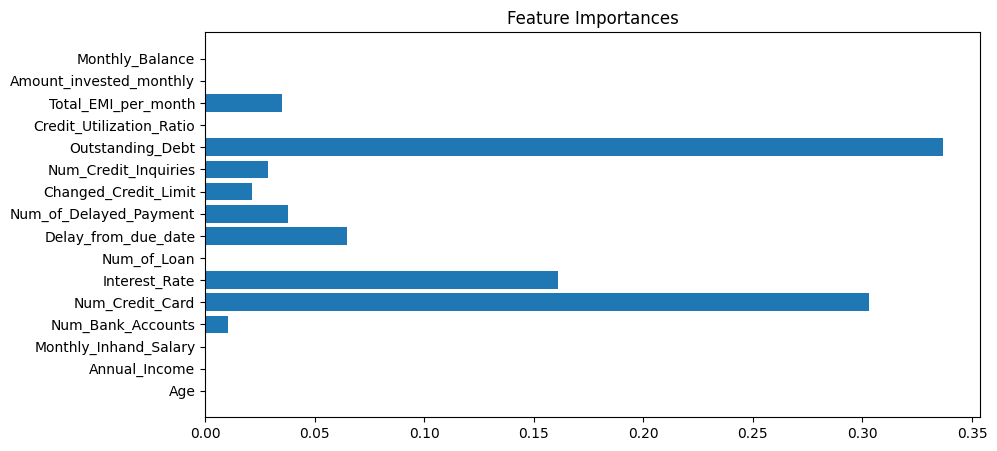

In [ ]:
print("Validation Accuracy:", accuracy_score(y_val_labels, ada_clf.predict(X_val_enc)))
print("Validation Classification Report:")
print(classification_report(y_val_labels, ada_clf.predict(X_val_enc)))

print("Test Accuracy:", accuracy_score(y_test_labels, ada_clf.predict(X_test_enc)))
print("Test Classification Report:")
print(classification_report(y_test_labels, ada_clf.predict(X_test_enc)))

The AdaBoost model significantly outperforms the baseline model, achieving higher accuracy (72% vs. 63%) and much better balance across classes, especially for the "Good" credit score, where recall improved from 19% to 54%. This indicates that AdaBoost is better at identifying all credit score categories and provides a more reliable classification overall.